In [13]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

In [2]:
df_cluster = pd.read_csv('C:\\Users\\p860n111\\OneDrive - The University of Kansas\\Test_DS_col\\mergedData.csv')

In [4]:
# divided the TempGlobal i.e. the continuous data into 3 bins and created a new column i.e. TempGlobal_bins
df_cluster_disct = df_cluster.copy(deep=True)
df_cluster_disct['TempGlobal_bins']=pd.cut(df_cluster_disct['TempGlobal'], 3,labels=["Low", "Medium", "High"])

In [7]:
df_cluster_disct.head(5)

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand,TempGlobal_bins
0,1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583,Low
1,1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917,Low
2,1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417,Low
3,1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167,Low
4,1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917,Low


In [6]:
#[(14.775, 15.204] = Low
# (15.204, 15.631] = Medium
# (15.631, 16.059]] = High

pd.cut(df_cluster_disct['TempGlobal'], 3).head()

0    (14.775, 15.204]
1    (14.775, 15.204]
2    (14.775, 15.204]
3    (14.775, 15.204]
4    (14.775, 15.204]
Name: TempGlobal, dtype: category
Categories (3, interval[float64]): [(14.775, 15.204] < (15.204, 15.631] < (15.631, 16.059]]

In [8]:
# split data into features (X) and labels (y)
X = df_cluster_disct.iloc[:,1:6]
y = df_cluster_disct.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

    SeaLevel         Coal          Oil          Gas  CO2-Concentration
9     -126.3   5727.78236    180.55570     63.88894         2789.82023
3     -117.9   5727.78236    180.55570     63.88894         2186.94199
94       6.6  26027.21237  37882.32542  21573.29342       116629.52000
58     -48.3  12602.78786   5444.44880   2091.66834         6833.20236
97      20.6  26868.04001  40179.75478  23390.79648       123114.31000
4        Low
31    Medium
77    Medium
34       Low
26    Medium
Name: TempGlobal_bins, dtype: category
Categories (3, object): [Low < Medium < High]


In [11]:
# see how many samples we have of each TempGlobal_bins 
df_cluster_disct["TempGlobal_bins"].value_counts()

Medium    55
Low       43
High      18
Name: TempGlobal_bins, dtype: int64

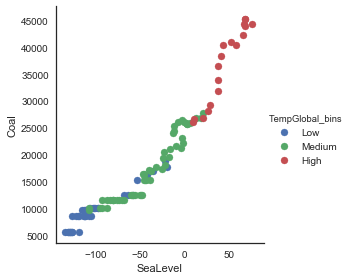

In [14]:
# use seaborn to make scatter plot showing TempGlobal_bins for each sample
sns.FacetGrid(df_cluster_disct, hue="TempGlobal_bins", size=4) \
   .map(plt.scatter, "SeaLevel", "Coal") \
   .add_legend();

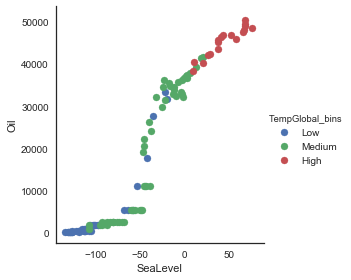

In [17]:
# use seaborn to make scatter plot showing TempGlobal_bins for each sample
sns.FacetGrid(df_cluster_disct, hue="TempGlobal_bins", size=4) \
   .map(plt.scatter, "SeaLevel", "Oil") \
   .add_legend();

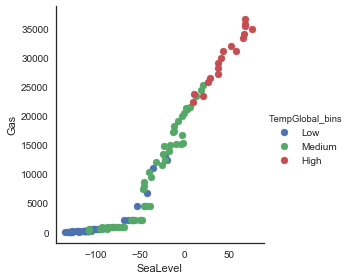

In [18]:
# use seaborn to make scatter plot showing TempGlobal_bins for each sample
sns.FacetGrid(df_cluster_disct, hue="TempGlobal_bins", size=4) \
   .map(plt.scatter, "SeaLevel", "Gas") \
   .add_legend();

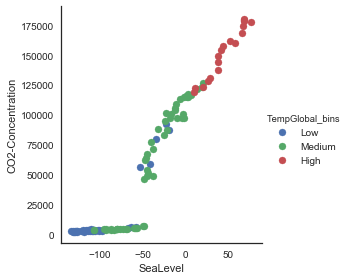

In [19]:

# use seaborn to make scatter plot showing TempGlobal_bins for each sample
sns.FacetGrid(df_cluster_disct, hue="TempGlobal_bins", size=4) \
   .map(plt.scatter, "SeaLevel", "CO2-Concentration") \
   .add_legend();

In [20]:
# features are more mixed.
# but a clustering algorithm might have a hard time realizing that there were
# three separate bins, which we happen to know in advance -
# it might not matter too much though - e.g. the low and medium
# seem to be very similar, so it might be just as well for your 
# purposes to lump them together.

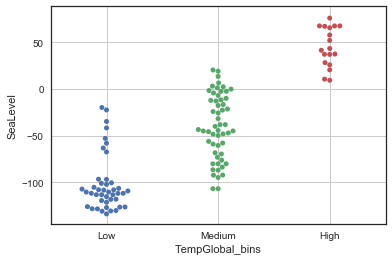

In [22]:
# show sea level distributions in a swarm plot - 
# just shows one dimension of the data, so not as useful as the previous plots
sns.swarmplot(x="TempGlobal_bins", y="SeaLevel", data=df_cluster_disct)
plt.grid()

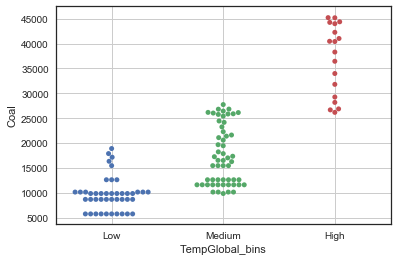

In [23]:
# show coal distributions in a swarm plot - 
# just shows one dimension of the data, so not as useful as the previous plots
sns.swarmplot(x="TempGlobal_bins", y="Coal", data=df_cluster_disct)
plt.grid()

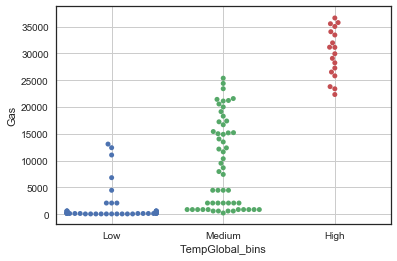

In [24]:
# show Gas distributions in a swarm plot - 
# just shows one dimension of the data, so not as useful as the previous plots
sns.swarmplot(x="TempGlobal_bins", y="Gas", data=df_cluster_disct)
plt.grid()

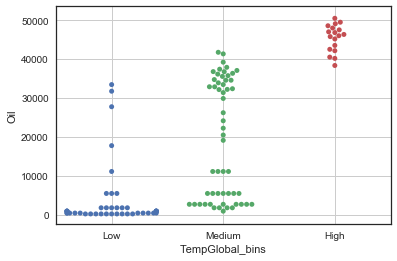

In [25]:
# show Oil distributions in a swarm plot - 
# just shows one dimension of the data, so not as useful as the previous plots
sns.swarmplot(x="TempGlobal_bins", y="Oil", data=df_cluster_disct)
plt.grid()

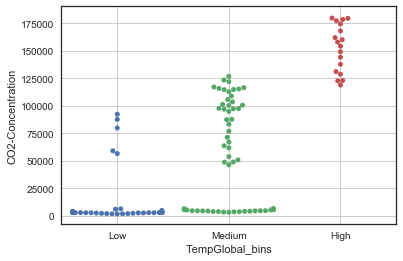

In [26]:
# show CO2-Concentration distributions in a swarm plot - 
# just shows one dimension of the data, so not as useful as the previous plots
sns.swarmplot(x="TempGlobal_bins", y="CO2-Concentration", data=df_cluster_disct)
plt.grid()

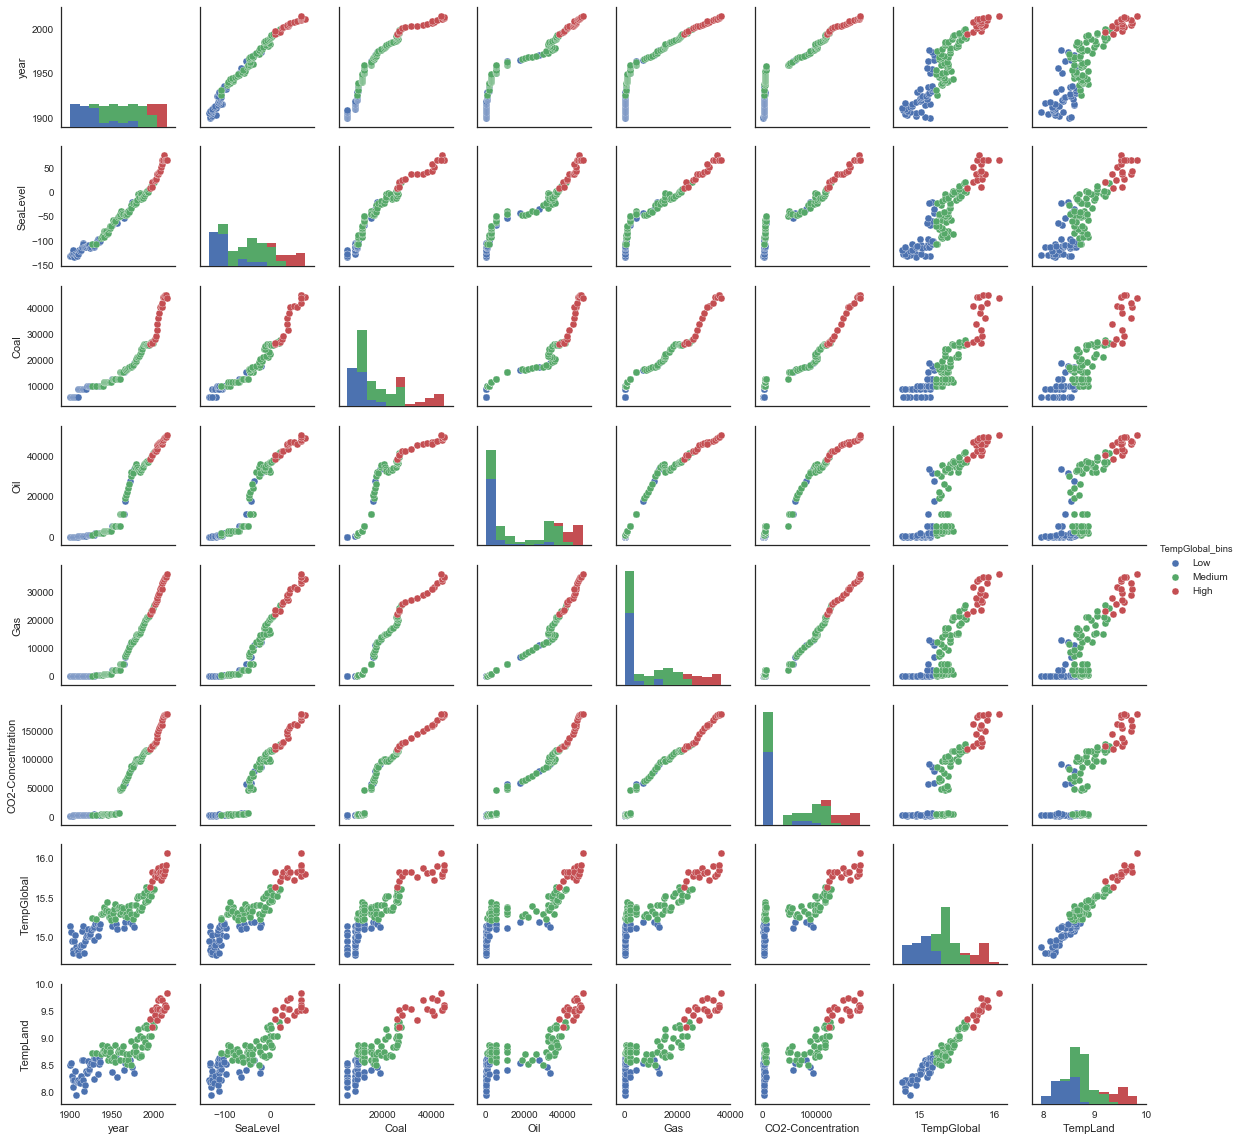

In [28]:
# make a scatter matrix showing each pair of features in the data.
# seaborn can show the TempGlobal_bins labels as different colors, but
# normally with EDA you wouldn't have that information. 

sns.pairplot(df_cluster_disct, hue="TempGlobal_bins", diag_kind="hist", size=2);

In [29]:
# so again, this shows how similar low and medium are, at least with the given features.

# but there could be features that you didn't measure that would more clearly separate the TempGlobal_bins.

# it's the same for any unsupervised learning - you need to have the right features
# to separate the groups in the best way.

In [30]:
# the data is unbalanced (eg Oil ~3x Gas), so should do feature scaling,
# otherwise the larger features will dominate the others in clustering, etc.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,SeaLevel,Coal,Oil,Gas,CO2-Concentration
20,-1.037681,-0.743741,-0.932950,-0.831312,-0.888004
33,-0.804861,-0.715809,-0.884918,-0.798650,-0.894674
62,0.109296,-0.206658,-0.367179,-0.456556,-0.083183
100,1.201492,0.970544,1.331523,1.391300,1.201583
61,0.198315,-0.206658,-0.367179,-0.456556,-0.115589


In [31]:
# K means clustering
# try clustering on the 5d data and see if can reproduce the actual clusters.

# ie imagine we don't have the TempGlobal_bins labels on this data and wanted to
# divide the data into TempGlobal_bins. could set an arbitrary number of clusters
# and try dividing them up into similar clusters.

# we happen to know there are 3 bins for TempGlobal_bins, so let's find 3 TempGlobal_bins and see
# if the predictions for each point matches the label in y.

from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [32]:
# ordinarily, when you don't have the actual labels, you might use 
# silhouette analysis to determine a good number of clusters k to use. 

# i.e. you would just run that same code for different values of k and print the value for 
# the silhouette score. 

# let's see what that value is for the case we just did, k=3. 

In [33]:
# Silhouette score - a value near +1 indicates that the sample is far away from the neighboring clusters.
# A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring
# clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [34]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.6739702286188362

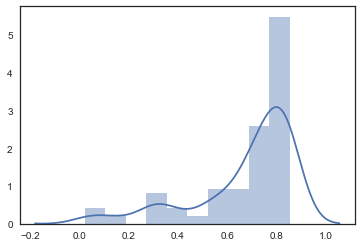

In [35]:
# note that this is the mean over all the samples - there might be some clusters 
# that are well separated and others that are closer together. 

# so let's look at the distribution of silhouette scores...

scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

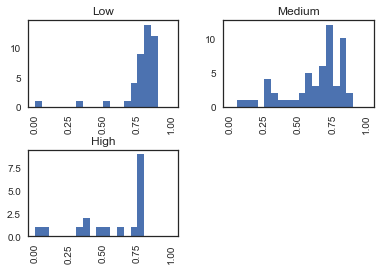

In [36]:
# can we add the TempGlobal_bins info to that plot?
# well, can plot them separately using pandas - 
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['TempGlobal_bins'] = df_cluster_disct['TempGlobal_bins']
df_scores.hist(by='TempGlobal_bins', column='SilhouetteScore', range=(0,1.0), bins=20);

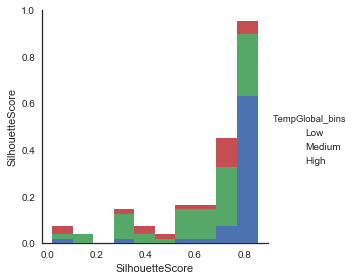

In [37]:
# so as expected, low and medium have similar silhouette scores than 
# the more separate high, because they are closer together.

# putting all the info in one chart:

sns.pairplot(df_scores, hue="TempGlobal_bins", size=4);

In [38]:
# so you can see that the blue species have higher silhouette scores
# (the legend doesn't show the colors though... so the pandas plot is more useful). 

# note that if we used the best mean silhouette score to try to find the best
# number of clusters k, we'd end up with 2 clusters, because the mean silhouette 
# score in that case would be largest, since the clusters would be better separated. 

# but, that's using k-means - gmm might give better results...

In [39]:
# Principal Component Analysis (PCA)

In [40]:
# so that was clustering on the orginal 5d data.

# Principal Component Analysis (PCA), which remaps the data
# to a new (smaller) coordinate system which tries to account for the# most information possible.

# just going from 4d to 2d, 
# so let's just use it to visualize the data...

In [41]:
# mash the data down into 2 dimensions

from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
83,1.469433,-0.203775
86,1.666197,-0.211254
114,4.840217,0.572803
31,-1.907791,0.089781
26,-1.954553,0.098045


In [46]:
# so that gives us new 2d coordinates for each data point.

# at this point, if you don't have labelled data,
# you can add the k-means cluster ids to this table and make a
# colored scatterplot. 

# we do actually have labels for the data points, but let's imagine
# we don't, and use the predicted labels to see what the predictions look like.

# first, convert TempGlobal_bins to an arbitrary number
y_id_array = pd.Categorical(df_cluster_disct['TempGlobal_bins']).codes

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['TempGlobal_binsId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,TempGlobal_binsId
28,-1.990289,0.074851,1,0
90,2.103827,-0.193413,0,1
50,-1.338642,0.285809,1,0
19,-2.062098,0.022206,1,0
79,1.345436,-0.562803,0,1


In [55]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (15,15))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Dataset");

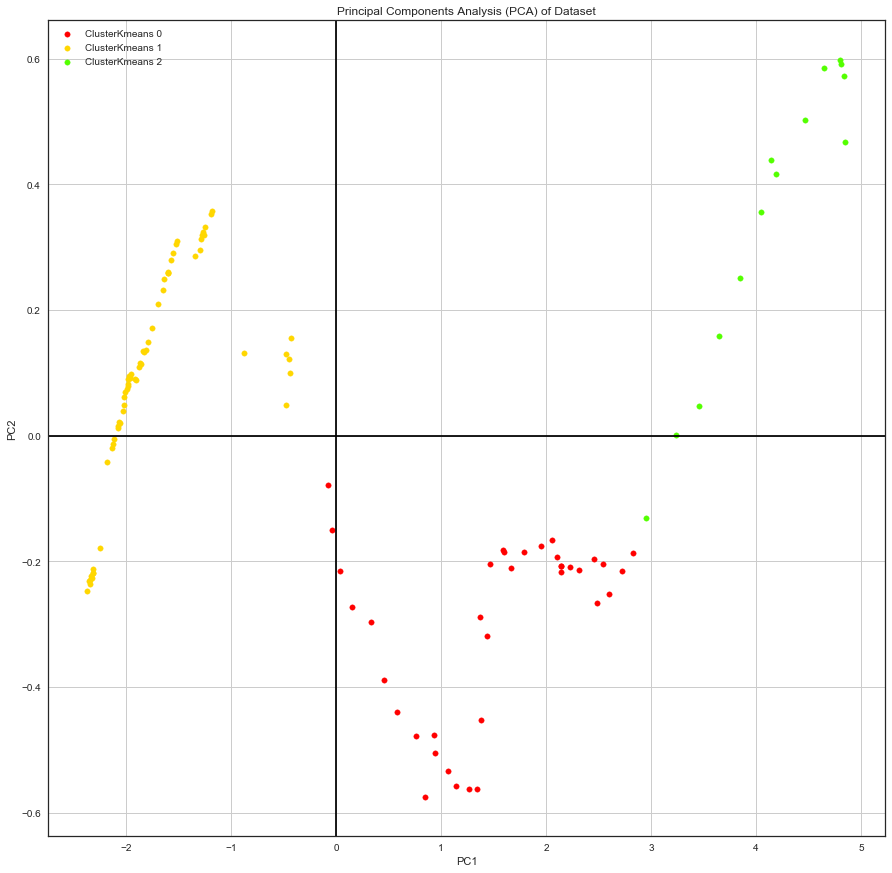

In [56]:
# plot the clusters each datapoint was assigned to
plotData(df_plot, 'ClusterKmeans')

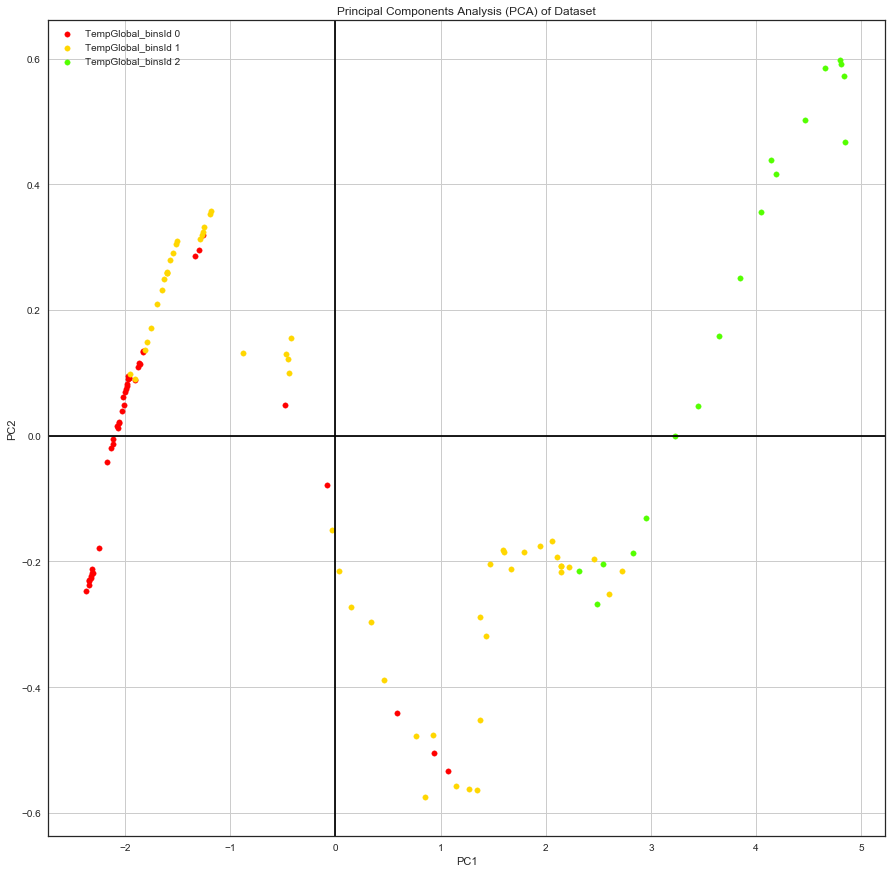

In [57]:
# so those are the *predicted* labels - what about the *actual* labels?
plotData(df_plot, 'TempGlobal_binsId')

In [58]:
# so the k-means clustering *did not* find the correct clusterings!

# q. so what do these dimensions mean?

# they're the principal components, which pick out the directions 
# of maximal variation in the original data.
# PC1 finds the most variation, PC2 the second-most. 
# the rest of the data is basically thrown away when the data is reduced down to 2d.

# q. if these principal components represent some latent (hidden) features, what would those be? 



In [59]:
# Gaussian Mixture Model (GMM) Clustering

In [60]:
# now let's try GMM clustering, which tries to fit normally-distributed clusters, 
# and might be the case when measuring things like petal and sepal sizes...

In [61]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

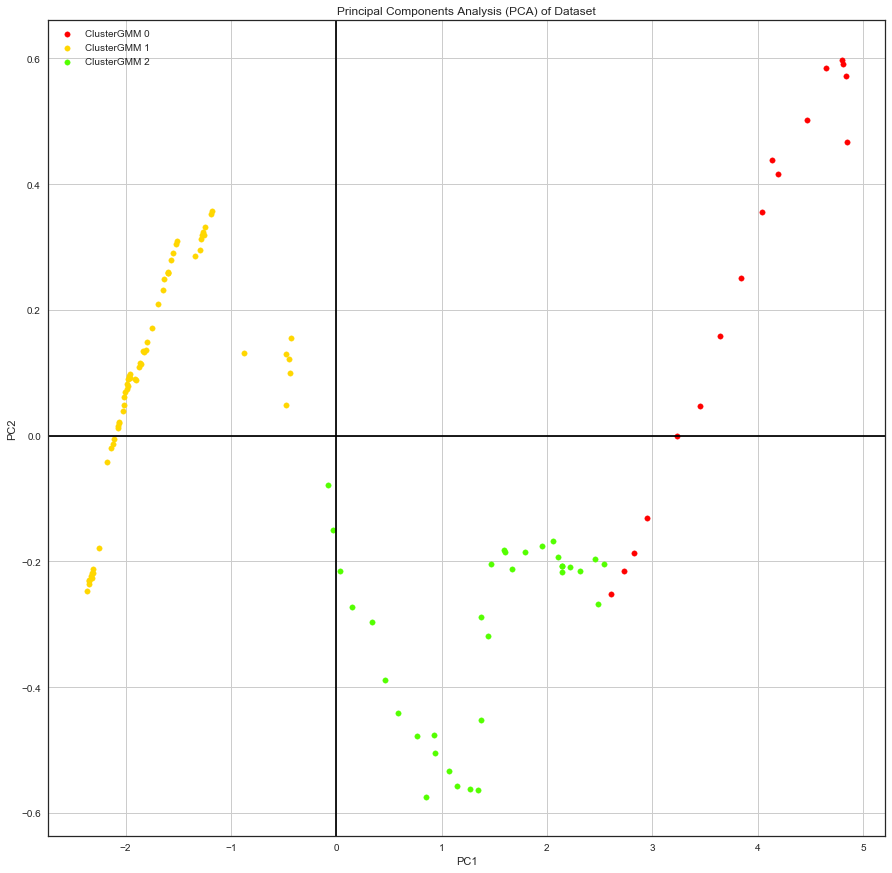

In [62]:
# add the GMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [64]:
# Comparing k-Means and GMM clustering

In [65]:
from sklearn.metrics.cluster import adjusted_rand_score

# first let's see how the k-means clustering did - 
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.30730777165594286

In [66]:
# now the GMM clustering - 
score = adjusted_rand_score(y, y_cluster_gmm)
score

0.2960981154626861

In [ ]:
# end of GMM and k mens clustering